In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,NaN,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,NaN,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,NaN,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	0
float64		column 3	0
float64		column 4	7
float64		column 5	14
float64		column 6	14
float64		column 7	0
float64		column 8	15
float64		column 9	8
float64		column 10	0
float64		column 11	7
float64		column 12	7
float64		column 13	15


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,157.000000,178.000000,178.000000,171.000000,164.000000,164.000000,178.000000,163.000000,170.000000,178.000000,171.000000,171.000000,163.000000
mean,12.984204,2.336348,2.366517,19.498246,99.969512,2.308841,2.029270,0.361595,1.599294,5.058090,0.958339,2.601754,745.226994
std,0.809013,1.117146,0.274344,3.364809,14.315646,0.615263,0.998859,0.124012,0.577522,2.318286,0.226777,0.714236,308.599391
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.330000,1.602500,2.210000,17.200000,88.750000,1.797500,1.205000,0.270000,1.250000,3.220000,0.790000,1.890000,506.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.400000,2.135000,0.340000,1.560000,4.690000,0.960000,2.780000,675.000000
75%,13.630000,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.430000,1.950000,6.200000,1.120000,3.170000,953.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

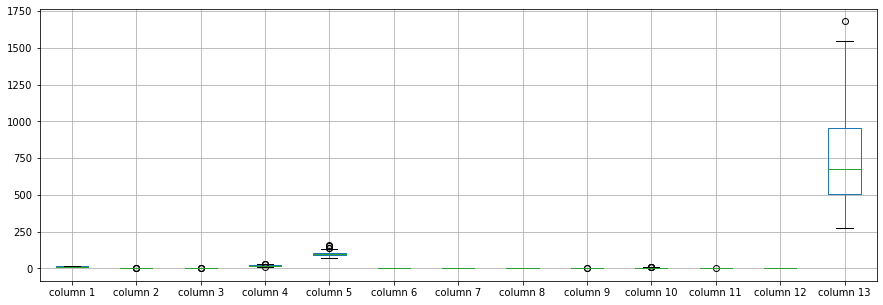

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.984204
column 2       2.336348
column 3       2.366517
column 4      19.498246
column 5      99.969512
column 6       2.308841
column 7       2.029270
column 8       0.361595
column 9       1.599294
column 10      5.058090
column 11      0.958339
column 12      2.601754
column 13    745.226994
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.065767,0.212640,-0.319567,0.249204,0.282192,0.221010,-0.133151,0.117285,0.545976,-0.065872,0.067739,0.601388
column 2,0.065767,1.000000,0.164045,0.296152,-0.064168,-0.300757,-0.411007,0.296054,-0.220718,0.248985,-0.554090,-0.384418,-0.203658
column 3,0.212640,0.164045,1.000000,0.438556,0.259368,0.170835,0.115077,0.173287,0.011627,0.258887,-0.085003,0.019325,0.186761
column 4,-0.319567,0.296152,0.438556,1.000000,-0.091826,-0.320895,-0.350520,0.336896,-0.197023,0.006374,-0.274749,-0.276888,-0.440949
column 5,0.249204,-0.064168,0.259368,-0.091826,1.000000,0.271660,0.205505,-0.281497,0.262892,0.174954,0.060391,0.104863,0.343925
column 6,0.282192,-0.300757,0.170835,-0.320895,0.271660,1.000000,0.858865,-0.516312,0.588169,-0.070390,0.437405,0.706005,0.486431
column 7,0.221010,-0.411007,0.115077,-0.350520,0.205505,0.858865,1.000000,-0.543667,0.650050,-0.172379,0.542073,0.796708,0.473508
column 8,-0.133151,0.296054,0.173287,0.336896,-0.281497,-0.516312,-0.543667,1.000000,-0.356888,0.164987,-0.307554,-0.549142,-0.347923
column 9,0.117285,-0.220718,0.011627,-0.197023,0.262892,0.588169,0.650050,-0.356888,1.000000,-0.022228,0.308071,0.509312,0.309357
column 10,0.545976,0.248985,0.258887,0.006374,0.174954,-0.070390,-0.172379,0.164987,-0.022228,1.000000,-0.511638,-0.420617,0.319994


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+65,13+65+65,13+65+65,13+65+65+65+65,13+65+65+65+65+65,13+65+65+65+65+65+65,13+65+65+65+65+65,13+65+65+65+65,13+65+65+65,13+65+65,13+65,13], vae_layer = False, seed = 650)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 878.3877064098011
Epoch: 1 , loss: 875.5337025035511
Epoch: 2 , loss: 881.1783058860085
Epoch: 3 , loss: 881.1870783025569
Epoch: 4 , loss: 874.1310868696733
Epoch: 5 , loss: 878.4159490411931
Epoch: 6 , loss: 879.7818548029119
Epoch: 7 , loss: 880.8017411665483
Epoch: 8 , loss: 875.4039029208096
Epoch: 9 , loss: 872.4866055575284
Epoch: 10 , loss: 877.151533647017
Epoch: 11 , loss: 879.8018243963069
Epoch: 12 , loss: 879.3991754705256
Epoch: 13 , loss: 878.6106456409801
Epoch: 14 , loss: 874.8371693004261
Epoch: 15 , loss: 879.8841275301846
Epoch: 16 , loss: 877.3478781960227
Epoch: 17 , loss: 877.2188221324574
Epoch: 18 , loss: 875.7999434037642
Epoch: 19 , loss: 876.3893488103694
Epoch: 20 , loss: 879.0072409889915
Epoch: 21 , loss: 875.914345481179
Epoch: 22 , loss: 876.5467362837358
Epoch: 23 , loss: 880.4482865767045
Epoch: 24 , loss: 880.7451116388494
Epoch: 25 , loss: 878.8088989257812
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-12.62331,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,-1023.223255
1,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000
2,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000
3,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,-0.625575,0.0,0.0,0.00000,0.0,0.000000
4,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000
174,0.00000,0.0,0.0,0.0,0.0,-0.445306,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000
175,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000
176,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,-0.35233,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2992.861604641241, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.27462288267665075

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5      19.519823
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.60669,1.71,2.43,15.6,127.0,2.800000,3.06,0.280000,2.29,5.64,1.04000,3.92,41.776745
1,13.20000,1.78,2.14,11.2,100.0,2.650000,2.76,0.260000,1.28,4.38,1.05000,3.40,1050.000000
2,13.16000,2.36,2.67,18.6,101.0,2.800000,3.24,0.300000,2.81,5.68,1.03000,3.17,1185.000000
3,14.37000,1.95,2.50,16.8,113.0,3.850000,3.49,-0.385575,2.18,7.80,0.86000,3.45,1480.000000
4,13.24000,2.59,2.87,21.0,118.0,2.800000,2.69,0.390000,1.82,4.32,1.04000,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71000,5.65,2.45,20.5,95.0,1.680000,0.61,0.520000,1.06,7.70,0.64000,1.74,740.000000
174,13.40000,3.91,2.48,23.0,102.0,1.354694,0.75,0.430000,1.41,7.30,0.70000,1.56,750.000000
175,13.27000,4.28,2.26,20.0,120.0,1.590000,0.69,0.430000,1.35,10.20,0.59000,1.56,835.000000
176,13.17000,2.59,2.37,20.0,120.0,1.650000,0.68,0.530000,1.46,9.30,0.24767,1.62,840.000000


In [20]:
imputations[-1].to_excel("Wine_NL_5(imp).xlsx", index=False, header=False)